In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
import pandas as pd
students_df = pd.read_csv("cleansedDenmark.csv")

# Deleting redundant columns 
students_df = students_df.iloc[: , 1:]

# Splitting timestamp and replacing it in df
students_df['tweet_timestamp'] = students_df['tweet_timestamp'].str.split(' ').str[0]
students_df

FileNotFoundError: [Errno 2] No such file or directory: 'cleansedDenmark.csv'

In [ ]:
# Imports
from sqlalchemy import create_engine, inspect, Table
# Open a connection to the postgresql database
db_conn = create_engine("postgresql://student:infomdss@db_assignments:5432/covid")

In [19]:
db_conn.execute("DROP TABLE IF EXISTS students_df CASCADE;")

In [ ]:
students_df.to_sql("students_df", db_conn)

In [9]:
fear = '''
SELECT count(students_df.emotion) as fear, tweet_timestamp
FROM students_df
where emotion = 'fear'
group by tweet_timestamp
order by tweet_timestamp


'''

#############################
# Your query is performed on the database to create the view
#if not create_table.isspace():
 #   db_conn.execute(fear)
    
table_fear = pd.read_sql(fear, db_conn)
print(table_fear)
fear = pd.DataFrame(table_fear)
fear

     fear tweet_timestamp
0       3      2020-01-27
1      22      2020-01-28
2      23      2020-01-29
3      26      2020-01-30
4      24      2020-01-31
..    ...             ...
579    49      2021-08-28
580    35      2021-08-29
581    51      2021-08-30
582    38      2021-08-31
583    51      2021-09-01

[584 rows x 2 columns]


,fear,tweet_timestamp
0,3,2020-01-27
1,22,2020-01-28
2,23,2020-01-29
3,26,2020-01-30
4,24,2020-01-31
...,...,...
579,49,2021-08-28
580,35,2021-08-29
581,51,2021-08-30
582,38,2021-08-31


In [10]:
happiness = '''
SELECT count(students_df.emotion) as happiness, tweet_timestamp
FROM students_df
where emotion = 'happiness'
group by tweet_timestamp
order by tweet_timestamp


'''

#############################
# Your query is performed on the database to create the view
#if not create_table.isspace():
 #   db_conn.execute(create_table)
    
table_happiness = pd.read_sql(happiness, db_conn)
print(table_happiness)

happiness = pd.DataFrame(table_happiness)


     happiness tweet_timestamp
0            9      2020-01-28
1           12      2020-01-29
2           11      2020-01-30
3           14      2020-01-31
4            3      2020-02-01
..         ...             ...
578         27      2021-08-28
579         14      2021-08-29
580         28      2021-08-30
581         33      2021-08-31
582         24      2021-09-01

[583 rows x 2 columns]


In [11]:
sadness = '''
SELECT count(students_df.emotion) as sadness, tweet_timestamp
FROM students_df
where emotion = 'sadness'
group by tweet_timestamp
order by tweet_timestamp


'''

#############################
# Your query is performed on the database to create the view
#if not create_table.isspace():
 #   db_conn.execute(sadness)
    
table_sadness = pd.read_sql(sadness, db_conn)
print(table_sadness)

sadness = pd.DataFrame(table_sadness)
sadness

     sadness tweet_timestamp
0          2      2020-01-28
1          1      2020-01-29
2          2      2020-01-31
3          3      2020-02-02
4          2      2020-02-04
..       ...             ...
567        7      2021-08-28
568        7      2021-08-29
569        9      2021-08-30
570        4      2021-08-31
571        1      2021-09-01

[572 rows x 2 columns]


,sadness,tweet_timestamp
0,2,2020-01-28
1,1,2020-01-29
2,2,2020-01-31
3,3,2020-02-02
4,2,2020-02-04
...,...,...
567,7,2021-08-28
568,7,2021-08-29
569,9,2021-08-30
570,4,2021-08-31


In [12]:
no_specific_emotion = '''
SELECT count(students_df.emotion) as no_specific_emotion, tweet_timestamp
FROM students_df
where emotion = 'no specific emotion'
group by tweet_timestamp
order by tweet_timestamp


'''

#############################
# Your query is performed on the database to create the view
#if not create_table.isspace():
 #   db_conn.execute(no_specific_emotion)
    
table_no_specific_emotion = pd.read_sql(no_specific_emotion, db_conn)
print(table_no_specific_emotion)

no_specific_emotion = pd.DataFrame(table_no_specific_emotion)

     no_specific_emotion tweet_timestamp
0                      8      2020-01-28
1                      5      2020-01-29
2                      6      2020-01-30
3                      8      2020-01-31
4                      4      2020-02-01
..                   ...             ...
577                   19      2021-08-28
578                   29      2021-08-29
579                   30      2021-08-30
580                   24      2021-08-31
581                   30      2021-09-01

[582 rows x 2 columns]


In [13]:
anger = '''
SELECT count(students_df.emotion) as anger, tweet_timestamp
FROM students_df
where emotion = 'anger'
group by tweet_timestamp
order by tweet_timestamp


'''

#############################
# Your query is performed on the database to create the view
#if not create_table.isspace():
 #   db_conn.execute(anger)
    
table_anger = pd.read_sql(anger, db_conn)
print(table_anger)

anger = pd.DataFrame(table_anger)

     anger tweet_timestamp
0       20      2020-01-28
1       11      2020-01-29
2       10      2020-01-30
3        9      2020-01-31
4        6      2020-02-01
..     ...             ...
577     57      2021-08-28
578     42      2021-08-29
579     56      2021-08-30
580     36      2021-08-31
581     28      2021-09-01

[582 rows x 2 columns]


In [15]:
df1 = (pd.merge(anger, fear, on='tweet_timestamp'))
df2 = (pd.merge(df1, happiness, on='tweet_timestamp'))
df3 = (pd.merge(df2, no_specific_emotion, on='tweet_timestamp'))
df4 = (pd.merge(df3, sadness, on='tweet_timestamp'))

# to date type
df4['tweet_timestamp'] = pd.to_datetime(df4.tweet_timestamp)
#df4['tweet_timestamp'].dt.strftime("%Y%m%d").astype(int)
#df4['tweet_timestamp'].str.replace("-","").astype(float)

df4.to_csv('RIP.csv')

In [16]:
import calmap
import calplot
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 10), dpi=80)

x1 = df4.tweet_timestamp 
y1 = df4.fear
y2 = df4.anger
y3 = df4.happiness
y4 = df4.sadness
plt.plot(x1, y1)
plt.plot(x1, y2)
plt.plot(x1, y3)
plt.plot(x1, y4)

plt.legend(["fear ", "anger", "happiness", "sadness"])

NameError: name 'df4' is not defined

<Figure size 640x800 with 0 Axes>

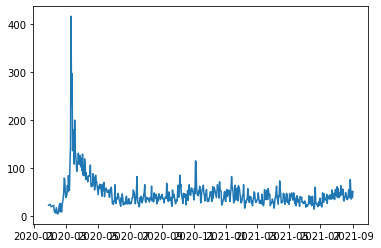

In [50]:
x1 = df4.tweet_timestamp 
y1 = df4.fear
y2 = df4.anger
plt.plot(x1, y1)

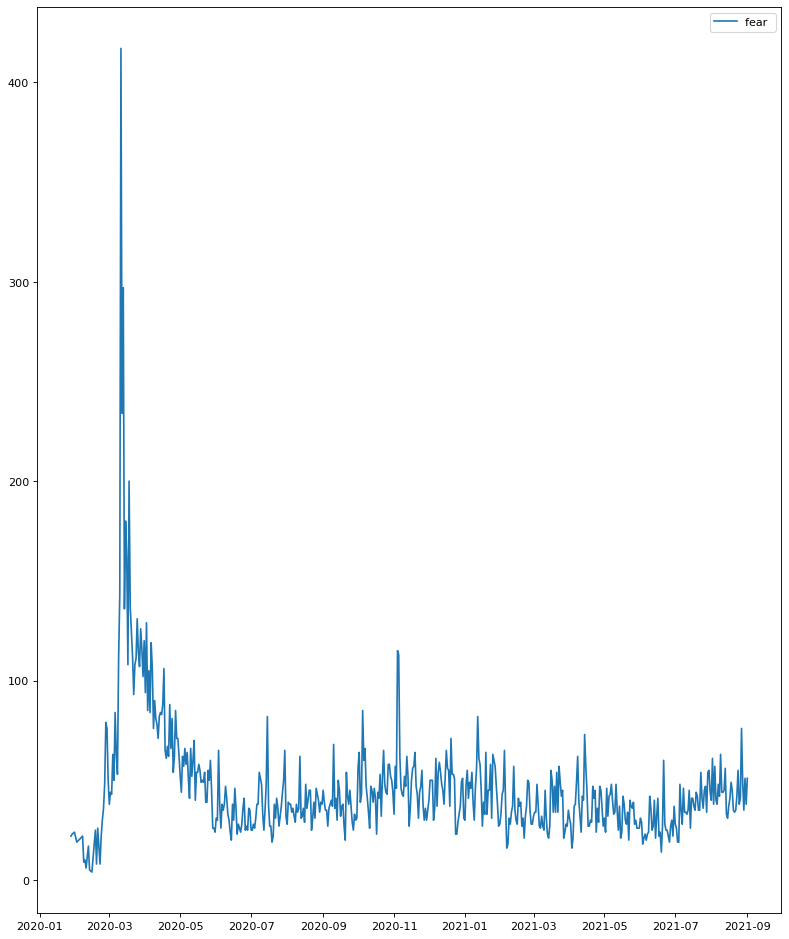

In [61]:
from matplotlib.pyplot import figure

figure(figsize=(12, 15), dpi=80)

x1 = df4.tweet_timestamp 
y1 = df4.fear
y2 = df4.anger
y3 = df4.happiness
y4 = df4.sadness
plt.plot(x1, y1)

plt.legend(["fear ", "anger", "happiness", "sadness"])

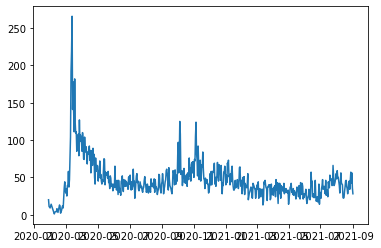

In [62]:
plt.plot(x1, y2)


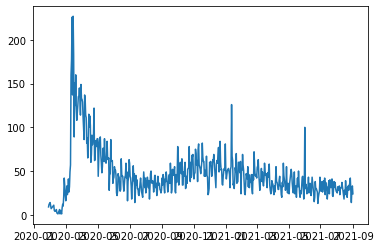

In [63]:
plt.plot(x1, y3)

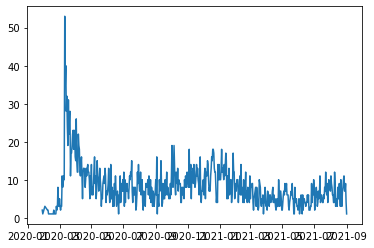

In [64]:
plt.plot(x1, y4)